# Importing necessary libraries

In [617]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.cluster import DBSCAN
from sklearn import metrics

import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import overpy

import warnings
warnings.filterwarnings('ignore')

# Understanding basic GIS concepts - I

Creating a point, linestring and polygon (and finding its area)

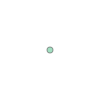

In [618]:
# Creating a point from lat,lon coordinates
point1 = Point(2.2, 4.2)
point1

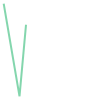

In [619]:
# Creating a linestring
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line2

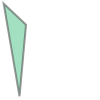

In [620]:
# Creating a polygon
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
poly


In [621]:
# Finding out polygon's area
poly.area

86.78900000000002

# Creating New Delhi's basemap + Understanding GIS Concepts - II

We import the latitude and longitude data for the relation New Delhi

In [622]:
# Storing the lat-lon data in a variable called 'Delhi'
delhi_data=([76.838894699999997,28.572662399999999],[76.840124500000002,28.571472400000001],[76.840167399999999,28.569627499999999],[76.840191300000001,28.5695522],[76.842377600000006,28.5626414],[76.843830299999993,28.561878199999999],[76.843791600000003,28.5565426],[76.845504399999996,28.554103999999999],[76.845860200000004,28.550011900000001],[76.852508599999993,28.548001299999999],[76.860974900000002,28.545474899999999],[76.864446799999996,28.543672900000001],[76.866367299999993,28.5415542],[76.867603200000005,28.536142300000002],[76.871328300000002,28.534413600000001],[76.872456499999998,28.533710500000002],[76.873585700000007,28.532973399999999],[76.873601800000003,28.532928399999999],[76.873722000000001,28.532592399999999],[76.874285599999993,28.5310168],[76.874291099999994,28.5287422],[76.876426600000002,28.526069799999998],[76.876867500000003,28.524949800000002],[76.885053400000004,28.521052399999999],[76.887138300000004,28.520306300000001],[76.887054300000003,28.519694399999999],[76.885531200000003,28.516980499999999],[76.883594099999996,28.512508],[76.881621999999993,28.5099062],[76.880521799999997,28.505581400000001],[76.881557099999995,28.5046508],[76.881881199999995,28.504747399999999],[76.882862900000006,28.5039865],[76.884331700000004,28.5030927],[76.885894800000003,28.502581200000002],[76.885438399999998,28.501375800000002],[76.891949600000004,28.500831300000002],[76.892702900000003,28.501284299999998],[76.896940700000002,28.5067536],[76.902350100000007,28.506740300000001],[76.906903600000007,28.5137629],[76.909979399999997,28.5120699],[76.910156700000002,28.512058],[76.911908499999996,28.512173600000001],[76.915918899999994,28.510795300000002],[76.918423599999997,28.5092347],[76.920901900000004,28.506909799999999],[76.924261099999995,28.507847900000002],[76.927552399999996,28.510495299999999],[76.934962499999997,28.511019000000001],[76.935770599999998,28.510515999999999],[76.939737600000001,28.507783799999999],[76.943325200000004,28.5053126],[76.945420200000001,28.505397599999998],[76.952758099999997,28.505316499999999],[76.954298300000005,28.505798899999998],[76.962049100000002,28.511527600000001],[76.970629900000006,28.515795000000001],[76.976010099999996,28.5189384],[76.978361399999997,28.521248],[76.980232700000002,28.519802899999998],[76.9812139,28.519117399999999],[76.983279400000001,28.517035499999999],[76.983382000000006,28.5169891],[76.990946300000004,28.513567699999999],[76.994527599999998,28.517608299999999],[76.995385900000002,28.517144500000001],[76.995969000000002,28.518031499999999],[76.996808099999996,28.5197124],[76.999021499999998,28.518483199999999],[76.999992300000002,28.517971200000002],[77.002722599999998,28.517292999999999],[77.0059191,28.515855800000001],[77.006726499999999,28.515635],[77.007040700000005,28.515549],[77.008530399999998,28.515141499999999],[77.010050699999994,28.514725500000001],[77.010492999999997,28.515122099999999],[77.010526400000003,28.515152100000002],[77.010826199999997,28.515420899999999],[77.011641299999994,28.516151799999999],[77.012553800000006,28.516970100000002],[77.012883900000006,28.517277700000001],[77.014472299999994,28.518757000000001],[77.016963700000005,28.521077399999999],[77.014629099999993,28.524348499999999],[77.010960400000002,28.5254513],[77.010577100000006,28.525774500000001],[77.009600000000006,28.5266409],[77.008475599999997,28.527028300000001],[77.005011800000005,28.528946999999999],[77.001650999999995,28.5308083],[77.001329499999997,28.530986299999999],[77.001664399999996,28.5334918],[77.004384900000005,28.537794999999999],[77.005460099999993,28.5394957],[77.0076538,28.539772899999999],[77.008633399999994,28.5403299],[77.0096858,28.539868999999999],[77.010193299999997,28.540268699999999],[77.012209200000001,28.5400104],[77.012849700000004,28.5402697],[77.013457000000002,28.540515599999999],[77.014094299999996,28.539998199999999],[77.016280800000004,28.5392112],[77.017423500000007,28.537687999999999],[77.019700599999993,28.536218000000002],[77.021702399999995,28.534959600000001],[77.021925300000007,28.534774800000001],[77.023254600000001,28.533561599999999],[77.0245903,28.5327132],[77.029782400000002,28.531701399999999],[77.029866799999994,28.531684899999998],[77.032119800000004,28.5310788],[77.034049800000005,28.530071499999998],[77.035610199999994,28.529257099999999],[77.035634900000005,28.529244200000001],[77.041714400000004,28.526071000000002],[77.042404599999998,28.5256984],[77.043151399999999,28.525237000000001],[77.043358299999994,28.5251546],[77.043370499999995,28.5241644],[77.044610500000005,28.523083700000001],[77.048508100000006,28.520919899999999],[77.046206499999997,28.516642699999998],[77.049172100000007,28.516045299999998],[77.0543531,28.5143512],[77.057542799999993,28.5128211],[77.057701100000003,28.512792399999999],[77.060660600000006,28.512255499999998],[77.0612165,28.512224],[77.063399599999997,28.512666500000002],[77.064525099999997,28.512689099999999],[77.065349400000002,28.512504499999999],[77.067162400000001,28.511928900000001],[77.067616000000001,28.512974499999999],[77.068865000000002,28.5145822],[77.070988600000007,28.5170499],[77.0713662,28.5175938],[77.072094100000001,28.5193619],[77.072221299999995,28.5201457],[77.072300100000007,28.520258800000001],[77.073364999999995,28.519507099999998],[77.074466700000002,28.518930699999999],[77.074774399999995,28.518808799999999],[77.075013900000002,28.5187138],[77.077438599999994,28.518440500000001],[77.079231800000002,28.518212800000001],[77.079294700000005,28.518204799999999],[77.080410999999998,28.5180224],[77.082749399999997,28.517089800000001],[77.083060500000002,28.516969799999998],[77.084090500000002,28.516658700000001],[77.084626099999994,28.516499199999998],[77.085957300000004,28.516102499999999],[77.092594199999994,28.5142311],[77.093238400000004,28.514047099999999],[77.093918099999996,28.513868200000001],[77.098658799999995,28.5114068],[77.095752700000006,28.507080299999998],[77.0976517,28.504855200000002],[77.100033499999995,28.503865300000001],[77.102307999999994,28.503101600000001],[77.1037666,28.502488700000001],[77.105397400000001,28.501338400000002],[77.110139599999997,28.499396099999998],[77.112478400000001,28.4984532],[77.119506900000005,28.495139000000002],[77.117675800000001,28.486984499999998],[77.116721100000007,28.485005399999999],[77.115061400000002,28.481564800000001],[77.114182499999998,28.473523499999999],[77.112472400000001,28.473184],[77.116454899999994,28.467223400000002],[77.120023500000002,28.462723199999999],[77.123476400000001,28.459710399999999],[77.123897400000004,28.455037600000001],[77.124259199999997,28.45102],[77.125391899999997,28.4502107],[77.127729099999996,28.442833499999999],[77.130689599999997,28.439922599999999],[77.132283900000004,28.438924499999999],[77.134848099999999,28.439150900000001],[77.137995900000007,28.438228299999999],[77.140598600000004,28.438483000000002],[77.143407600000003,28.4375547],[77.147036099999994,28.436748900000001],[77.149299999999997,28.436557499999999],[77.150317099999995,28.435706499999998],[77.151083200000002,28.435355600000001],[77.151738699999996,28.434789500000001],[77.152040200000002,28.4341045],[77.156347800000006,28.431432600000001],[77.159852900000004,28.4302505],[77.161545700000005,28.4293069],[77.162702300000007,28.426938700000001],[77.162337500000007,28.424436499999999],[77.163669999999996,28.4216926],[77.163764400000005,28.419733699999998],[77.164132600000002,28.4148374],[77.168228900000003,28.4132313],[77.170355400000005,28.411049599999998],[77.172404499999999,28.405451599999999],[77.174230600000001,28.404624999999999],[77.175974299999993,28.40691],[77.1784076,28.410397799999998],[77.183486500000001,28.409818399999999],[77.185570200000001,28.409441000000001],[77.221505199999996,28.413358899999999],[77.231171500000002,28.422072100000001],[77.242183499999996,28.428129599999998],[77.240726499999994,28.429002799999999],[77.243600400000005,28.432851200000002],[77.245513799999998,28.4354133],[77.245868200000004,28.448256600000001],[77.246071700000002,28.449846999999998],[77.245494300000004,28.450689799999999],[77.2423723,28.455246299999999],[77.240182399999995,28.4563597],[77.233330100000003,28.455057700000001],[77.231630699999997,28.456287700000001],[77.234904999999998,28.4700734],[77.243528800000007,28.479382600000001],[77.262703599999995,28.4880876],[77.270248199999997,28.488389399999999],[77.271708200000006,28.490252300000002],[77.275631700000005,28.4938073],[77.276817600000001,28.493720799999998],[77.277393799999999,28.494006599999999],[77.277925400000001,28.494137299999998],[77.278430299999997,28.494152100000001],[77.278783399999995,28.494331800000001],[77.278956699999995,28.4943171],[77.279085800000004,28.494269200000002],[77.279308299999997,28.494286599999999],[77.279697799999994,28.494438500000001],[77.279858500000003,28.494486200000001],[77.280213000000003,28.494571199999999],[77.282162400000004,28.4949482],[77.290924799999999,28.497373700000001],[77.296855699999995,28.495020199999999],[77.300651099999996,28.494698],[77.300637699999996,28.490272399999998],[77.301154299999993,28.490272699999998],[77.301422400000007,28.4907459],[77.305803499999996,28.489720899999998],[77.309369799999999,28.488461099999999],[77.314807200000004,28.4840214],[77.317142399999994,28.4857358],[77.320042799999996,28.4878651],[77.326626000000005,28.490509200000002],[77.330471299999999,28.4958952],[77.346601000000007,28.518539499999999],[77.336915099999999,28.523744900000001],[77.316198299999996,28.542909900000001],[77.304096200000004,28.551655700000001],[77.301076199999997,28.558683500000001],[77.293909799999994,28.574218200000001],[77.292886199999998,28.576174099999999],[77.295733600000005,28.5825581],[77.300172099999997,28.586873799999999],[77.301540299999999,28.586876199999999],[77.302857900000006,28.586663900000001],[77.3044218,28.585797299999999],[77.308857599999996,28.589328099999999],[77.310158599999994,28.590741699999999],[77.311138299999996,28.5919457],[77.311132000000001,28.592625200000001],[77.311324600000006,28.5931228],[77.311976900000005,28.593804599999999],[77.312657700000003,28.595181199999999],[77.313489300000001,28.595814799999999],[77.313181499999999,28.596339700000001],[77.313381899999996,28.5965247],[77.314185699999996,28.596754600000001],[77.314927900000001,28.596966900000002],[77.317120000000003,28.5968503],[77.319494399999996,28.5974307],[77.320125200000007,28.597583499999999],[77.321232199999997,28.597689500000001],[77.321890300000007,28.5976426],[77.322595800000002,28.597528100000002],[77.325895099999997,28.598181400000001],[77.326368799999997,28.598509499999999],[77.326714800000005,28.598749099999999],[77.327115800000001,28.5986704],[77.328161100000003,28.5993706],[77.329718700000001,28.600414000000001],[77.331676799999997,28.601137099999999],[77.333618700000002,28.6014856],[77.334713100000002,28.601942300000001],[77.335603500000005,28.601692799999999],[77.336746199999993,28.601801200000001],[77.337642000000002,28.6024417],[77.338423199999994,28.603232299999998],[77.338699000000005,28.602989699999998],[77.339577700000007,28.604132499999999],[77.340292099999999,28.604608599999999],[77.340791400000001,28.605215699999999],[77.341222099999996,28.6051404],[77.342059399999997,28.610162299999999],[77.341762599999996,28.613606900000001],[77.341691400000002,28.613626100000001],[77.3416608,28.613724000000001],[77.341528600000004,28.613766500000001],[77.341720300000006,28.6157252],[77.3418542,28.6170951],[77.342007899999999,28.618759799999999],[77.341937099999996,28.619342499999998],[77.341680199999999,28.620185200000002],[77.341432999999995,28.620768200000001],[77.341043200000001,28.621226400000001],[77.340316299999998,28.621805599999998],[77.340165600000006,28.622033699999999],[77.340422799999999,28.6236487],[77.339599800000002,28.624098],[77.338603500000005,28.624933899999998],[77.336510899999993,28.626318099999999],[77.334429900000003,28.627727400000001],[77.333769599999997,28.628881100000001],[77.332290200000003,28.629917899999999],[77.331241700000007,28.631316500000001],[77.329665899999995,28.631841000000001],[77.328803500000006,28.632283000000001],[77.327095400000005,28.6329216],[77.326009200000001,28.633168399999999],[77.324308200000004,28.6349278],[77.322011700000004,28.6367878],[77.316083599999999,28.6412336],[77.316441299999994,28.6421609],[77.316582999999994,28.642380899999999],[77.3173678,28.643428499999999],[77.317210700000004,28.6435806],[77.317325600000004,28.644146599999999],[77.317471800000007,28.6449794],[77.318316199999998,28.647077299999999],[77.318783300000007,28.648150900000001],[77.319399399999995,28.6494967],[77.320360899999997,28.6520115],[77.320612800000006,28.6539073],[77.320081200000004,28.654572099999999],[77.320128800000006,28.662583900000001],[77.322537999999994,28.669671399999999],[77.324448099999998,28.671241800000001],[77.325049199999995,28.673875599999999],[77.325244600000005,28.6778564],[77.326083600000004,28.678254599999999],[77.330067200000002,28.678617899999999],[77.330071500000003,28.678622499999999],[77.331758899999997,28.680391400000001],[77.332952199999994,28.681642100000001],[77.332192800000001,28.682885800000001],[77.330727800000005,28.688391299999999],[77.327314599999994,28.693670399999998],[77.323687800000002,28.698705400000001],[77.325680599999998,28.702098599999999],[77.325877599999998,28.702434],[77.325666600000005,28.705610700000001],[77.325427000000005,28.708793499999999],[77.328209000000001,28.7114762],[77.331106700000007,28.7131972],[77.328111800000002,28.713092700000001],[77.327132800000001,28.713351599999999],[77.326275499999994,28.713108800000001],[77.324528200000003,28.713041499999999],[77.323518199999995,28.7121669],[77.322500099999999,28.711461199999999],[77.321385300000003,28.7126223],[77.320652600000003,28.712928099999999],[77.320137799999998,28.713104900000001],[77.318722399999999,28.713590799999999],[77.317235400000001,28.714104299999999],[77.315815999999998,28.712844400000002],[77.313511500000004,28.713441],[77.3044242,28.711834700000001],[77.299028699999994,28.7098032],[77.295931199999998,28.705091500000002],[77.292275000000004,28.705893100000001],[77.291259100000005,28.7063661],[77.2892267,28.708378400000001],[77.287319100000005,28.712333399999999],[77.286338599999993,28.714447799999999],[77.289399599999996,28.717168000000001],[77.289733200000001,28.7209279],[77.290870499999997,28.7227353],[77.286634800000002,28.724900399999999],[77.286462,28.724988700000001],[77.284353800000005,28.7279871],[77.280042899999998,28.732486000000002],[77.275665500000002,28.735562300000002],[77.273586300000005,28.735958400000001],[77.260921999999994,28.7355868],[77.255834399999998,28.738541699999999],[77.255329099999997,28.741054299999998],[77.255736799999994,28.7411888],[77.255889100000005,28.743040100000002],[77.257092900000004,28.7450221],[77.257754500000004,28.746762400000001],[77.257846000000001,28.747003200000002],[77.258980100000002,28.7476974],[77.259477899999993,28.748733999999999],[77.259650600000001,28.749790300000001],[77.259624900000006,28.750541800000001],[77.258903900000007,28.751255799999999],[77.258671100000001,28.752633800000002],[77.255315100000004,28.7541227],[77.2548484,28.755848700000001],[77.253703599999994,28.7556154],[77.252189799999996,28.755436700000001],[77.250592299999994,28.755221299999999],[77.248448699999997,28.7555044],[77.246804999999995,28.7559465],[77.245496099999997,28.756563499999999],[77.2441496,28.757312200000001],[77.242556399999998,28.7578718],[77.240322599999999,28.758224599999998],[77.238109499999993,28.759103],[77.238677800000005,28.761967200000001],[77.235590000000002,28.771259100000002],[77.233482800000004,28.771183799999999],[77.2328799,28.774953],[77.221039399999995,28.7791602],[77.228033499999995,28.784574500000002],[77.224428599999996,28.7863875],[77.213795300000001,28.784386600000001],[77.207276500000006,28.786695999999999],[77.203300499999997,28.791876999999999],[77.201897200000005,28.793870299999998],[77.200023900000005,28.796963600000002],[77.199283600000001,28.801029],[77.199242699999999,28.804526200000002],[77.200600600000001,28.808786000000001],[77.202124699999999,28.8135671],[77.218720099999999,28.8108428],[77.218423999999999,28.813471400000001],[77.219363799999996,28.817487199999999],[77.220771200000001,28.818717599999999],[77.223120800000004,28.8196257],[77.223251700000006,28.820584499999999],[77.223211000000006,28.821481200000001],[77.223669099999995,28.8223178],[77.223116500000003,28.823109200000001],[77.221515999999994,28.825268399999999],[77.220928099999995,28.826697100000001],[77.220919499999994,28.8285844],[77.221428099999997,28.830441700000002],[77.222132000000002,28.833332800000001],[77.220784399999999,28.834126099999999],[77.215003899999999,28.841515999999999],[77.215057599999994,28.846001099999999],[77.216138599999994,28.847720299999999],[77.216567800000007,28.849334800000001],[77.215488300000004,28.8527816],[77.214188500000006,28.856138300000001],[77.211289100000002,28.856463300000001],[77.209084599999997,28.8572986],[77.206373400000004,28.8570666],[77.204842299999996,28.856901199999999],[77.204049499999996,28.8569304],[77.202500200000003,28.857652000000002],[77.199207599999994,28.859143199999998],[77.197073599999996,28.859429800000001],[77.196184200000005,28.8593537],[77.194986799999995,28.8592513],[77.191994800000003,28.858656499999999],[77.190416400000004,28.858342700000001],[77.184062699999998,28.857938499999999],[77.182154100000005,28.857786399999998],[77.180483600000002,28.857837100000001],[77.1782295,28.8585973],[77.175194300000001,28.8585344],[77.173154699999998,28.8574959],[77.173256699999996,28.856451100000001],[77.173150399999997,28.8556919],[77.172765299999995,28.854849900000001],[77.172060400000007,28.8500537],[77.169968299999994,28.850617499999998],[77.168936099999996,28.850478500000001],[77.167082199999996,28.848833899999999],[77.166298999999995,28.849324500000002],[77.162640499999995,28.845072999999999],[77.158670799999996,28.840336499999999],[77.157093700000004,28.839214399999999],[77.1567139,28.838511400000002],[77.157046500000007,28.8375527],[77.157994900000006,28.836847899999999],[77.152999500000007,28.837688100000001],[77.149055599999997,28.837981299999999],[77.145279099999996,28.838050899999999],[77.144092499999999,28.838748200000001],[77.142236400000002,28.839428600000002],[77.142245000000003,28.841498099999999],[77.141425299999995,28.842462300000001],[77.141553999999999,28.843338200000002],[77.141942400000005,28.8472401],[77.145253299999993,28.852070300000001],[77.145515099999997,28.853701600000001],[77.144532299999995,28.8546789],[77.143706199999997,28.854685499999999],[77.142904799999997,28.855301900000001],[77.142330799999996,28.855780200000002],[77.141870499999996,28.856503799999999],[77.1409843,28.859175199999999],[77.141166699999999,28.8603591],[77.140937100000002,28.860624999999999],[77.140332000000001,28.8606655],[77.140222600000001,28.861748800000001],[77.134094300000001,28.8628106],[77.1337391,28.8631271],[77.132845399999994,28.8624911],[77.130538700000002,28.8621312],[77.124700200000007,28.859515300000002],[77.124921200000003,28.8580185],[77.124300000000005,28.857548699999999],[77.122881599999999,28.857930199999998],[77.121860100000006,28.857954899999999],[77.119394600000007,28.8607625],[77.117045000000005,28.8623862],[77.115392799999995,28.864291699999999],[77.109994,28.8698953],[77.1079534,28.869681100000001],[77.103219800000005,28.870545499999999],[77.097138700000002,28.870693899999999],[77.094444800000005,28.871468],[77.0932806,28.871802599999999],[77.087823999999998,28.875541800000001],[77.088298199999997,28.8766842],[77.087620099999995,28.881013299999999],[77.086744600000003,28.8817047],[77.082588200000004,28.883446299999999],[77.082142000000005,28.881437900000002],[77.080500499999999,28.879284699999999],[77.077438299999997,28.8770223],[77.079339599999997,28.8716635],[77.078730199999995,28.8715686],[77.078133699999995,28.870973899999999],[77.0777796,28.870719300000001],[77.077645500000003,28.870343500000001],[77.076905199999999,28.869744000000001],[77.075453600000003,28.8689201],[77.074674700000003,28.867191300000002],[77.073405500000007,28.867707100000001],[77.072636200000005,28.868291500000002],[77.072096599999995,28.868768800000002],[77.071284399999996,28.868694600000001],[77.070421800000005,28.867816999999999],[77.069935799999996,28.867802900000001],[77.069510899999997,28.867509800000001],[77.069288799999995,28.8670297],[77.0638364,28.869209399999999],[77.061220700000007,28.8707183],[77.058301400000005,28.8680162],[77.0559078,28.864457099999999],[77.054384200000001,28.8624218],[77.053709499999997,28.861861000000001],[77.053684000000004,28.861828200000001],[77.053149399999995,28.861141199999999],[77.052928399999999,28.860879099999998],[77.052661299999997,28.860019300000001],[77.052072300000006,28.859106000000001],[77.051874799999993,28.858045099999998],[77.051803000000007,28.8567982],[77.051126999999994,28.854944199999998],[77.0511324,28.854552399999999],[77.049909200000002,28.8528035],[77.048112200000006,28.850323700000001],[77.047142399999998,28.849384000000001],[77.046625199999994,28.848255399999999],[77.045994399999998,28.847698099999999],[77.045557700000003,28.847042099999999],[77.045484700000003,28.8465074],[77.045233699999997,28.845905999999999],[77.045773400000002,28.8456109],[77.045450399999993,28.844439000000001],[77.045491200000001,28.842204200000001],[77.044927700000002,28.840182200000001],[77.044633099999999,28.840181300000001],[77.042758300000003,28.8386475],[77.042057200000002,28.837733],[77.041977200000005,28.837091099999999],[77.042798500000004,28.834998599999999],[77.042219200000005,28.833583600000001],[77.041335599999996,28.833032800000002],[77.040171599999994,28.831803499999999],[77.038619100000005,28.832763100000001],[77.0367909,28.833309100000001],[77.035224499999998,28.834160700000002],[77.033692400000007,28.8345366],[77.032595900000004,28.8351297],[77.030866399999994,28.835744200000001],[77.0282014,28.836605200000001],[77.027132800000004,28.836871200000001],[77.026018100000002,28.837789399999998],[77.023378800000003,28.839142800000001],[77.020163400000001,28.8393175],[77.018014399999998,28.839956699999998],[77.014875099999998,28.840555299999998],[77.009427000000002,28.8408081],[77.005734099999998,28.840203800000001],[76.999751000000003,28.8384055],[76.999155200000004,28.838226500000001],[76.994361600000005,28.839624000000001],[76.993048400000006,28.838765899999999],[76.990486300000001,28.837790300000002],[76.989143200000001,28.835641899999999],[76.987124499999993,28.834382099999999],[76.986583699999997,28.829748500000001],[76.984980800000002,28.8268272],[76.980335199999999,28.8214863],[76.977144600000003,28.822636899999999],[76.975955799999994,28.822755300000001],[76.974777799999998,28.825047000000001],[76.973335800000001,28.826669299999999],[76.972301599999994,28.827069699999999],[76.971348899999995,28.8276374],[76.970258799999996,28.8274908],[76.968147299999998,28.827838499999999],[76.966784799999999,28.827513400000001],[76.965825600000002,28.8276881],[76.965677600000006,28.825838399999999],[76.964860099999996,28.825345899999999],[76.964490999999995,28.824620199999998],[76.964915899999994,28.8241333],[76.963765100000003,28.8227318],[76.963999000000001,28.822392900000001],[76.964013499999993,28.8220508],[76.964827900000003,28.821181800000002],[76.964747299999999,28.820759200000001],[76.964922700000002,28.820139300000001],[76.964739800000004,28.8198474],[76.964515000000006,28.819641099999998],[76.962606399999999,28.8162199],[76.962238900000003,28.815817599999999],[76.961701300000001,28.8148996],[76.961145700000003,28.8149981],[76.9605964,28.815303],[76.959006400000007,28.815327400000001],[76.957113800000002,28.816397200000001],[76.9512237,28.8182528],[76.949213099999994,28.8160776],[76.948290400000005,28.814195600000001],[76.947447199999999,28.813601500000001],[76.947191799999999,28.812420800000002],[76.945402200000004,28.8097736],[76.946756199999996,28.8080626],[76.945805699999994,28.8047158],[76.943453899999994,28.801515500000001],[76.942241499999994,28.798302],[76.944211300000006,28.798238099999999],[76.946676800000006,28.797534800000001],[76.947985799999998,28.795985300000002],[76.949732400000002,28.7947217],[76.954028199999996,28.790278099999998],[76.951487599999993,28.787192099999999],[76.950060699999995,28.783207099999998],[76.948307600000007,28.779772900000001],[76.950217300000006,28.775332500000001],[76.955262000000005,28.769415299999999],[76.955650399999996,28.767662300000001],[76.951329999999999,28.763368799999999],[76.950948100000005,28.763006799999999],[76.950455599999998,28.7629381],[76.949788299999994,28.762343699999999],[76.947462299999998,28.759442199999999],[76.946744499999994,28.758749900000002],[76.945717700000003,28.757250800000001],[76.944425899999999,28.7538892],[76.950541400000006,28.750354399999999],[76.953441499999997,28.747805100000001],[76.955920800000001,28.745884499999999],[76.956518500000001,28.7450641],[76.958755400000001,28.742836700000002],[76.957993700000003,28.741737799999999],[76.956723400000001,28.739220499999998],[76.956261600000005,28.7385321],[76.956029200000003,28.738185699999999],[76.956344700000002,28.737429299999999],[76.958437799999999,28.735700399999999],[76.958595900000006,28.7353843],[76.959793899999994,28.732989100000001],[76.959857200000002,28.731970100000002],[76.959650100000005,28.7309719],[76.959836899999999,28.729921900000001],[76.959783099999996,28.729535299999998],[76.955871400000007,28.723452900000002],[76.951228,28.717939300000001],[76.948116600000006,28.7124612],[76.951669999999993,28.7099695],[76.961379600000001,28.703794500000001],[76.966476799999995,28.7000852],[76.968024900000003,28.699199499999999],[76.966408099999995,28.697849099999999],[76.964426500000002,28.695197100000001],[76.963475900000006,28.693430599999999],[76.963221599999997,28.692057500000001],[76.961360200000001,28.6895521],[76.959582400000002,28.6877225],[76.958882900000006,28.686405700000002],[76.957430200000005,28.683962399999999],[76.956756400000003,28.6807923],[76.955990400000005,28.6760737],[76.955616000000006,28.671573299999999],[76.954501199999996,28.6695739],[76.951169500000006,28.670566099999998],[76.9490488,28.671341699999999],[76.945132799999996,28.6716072],[76.944598499999998,28.671128],[76.943917200000001,28.670824],[76.937368399999997,28.670235699999999],[76.935454500000006,28.667717799999998],[76.934830099999999,28.667282400000001],[76.933215399999995,28.665180299999999],[76.933181000000005,28.6643872],[76.932572199999996,28.662237900000001],[76.932232600000006,28.661359099999999],[76.931684399999995,28.660622],[76.931188700000007,28.6592819],[76.924516400000002,28.6496429],[76.929217399999999,28.6457753],[76.930759699999996,28.6427768],[76.932684399999999,28.641247700000001],[76.935287200000005,28.638901199999999],[76.9367807,28.637486800000001],[76.939853400000004,28.635051700000002],[76.944394200000005,28.6330563],[76.943557499999997,28.630813400000001],[76.943247999999997,28.629983599999999],[76.942396200000005,28.627231900000002],[76.939244000000002,28.623167299999999],[76.937205599999999,28.621084100000001],[76.935266299999995,28.618441600000001],[76.933551800000004,28.619048500000002],[76.927794700000007,28.623244799999998],[76.924569099999999,28.627145299999999],[76.921060800000006,28.6307577],[76.919133900000006,28.631478999999999],[76.914233899999999,28.632179900000001],[76.908724800000002,28.627051099999999],[76.906534100000002,28.623624499999998],[76.902185000000003,28.626196199999999],[76.892938400000006,28.631366],[76.889357099999998,28.631804800000001],[76.884393900000006,28.623655100000001],[76.877018500000005,28.6097322],[76.874194700000004,28.6050495],[76.871845500000006,28.603000300000001],[76.870433599999998,28.5974389],[76.868120899999994,28.5912896],[76.866663500000001,28.588734500000001],[76.865382400000001,28.587366599999999],[76.864610099999993,28.5855295],[76.857105399999995,28.585259099999998],[76.846201399999998,28.5845749],[76.846010500000006,28.584562900000002],[76.839466099999996,28.582544800000001],[76.839435899999998,28.582535400000001],[76.838835099999997,28.573230599999999],[76.838894699999997,28.572662399999999])

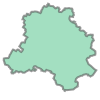

In [623]:
# Converting the data into a shapely polygon, then visualizing it
delhi_data=Polygon(delhi_data)
delhi_data

In [624]:
# Converting the polygon file to a geodataframe and checking it
delhi = gpd.GeoDataFrame(crs='epsg:4326')
delhi.loc[0,'geometry'] = delhi_data
delhi

,geometry
0,"POLYGON ((76.8388947 28.5726624, 76.8401245 28..."


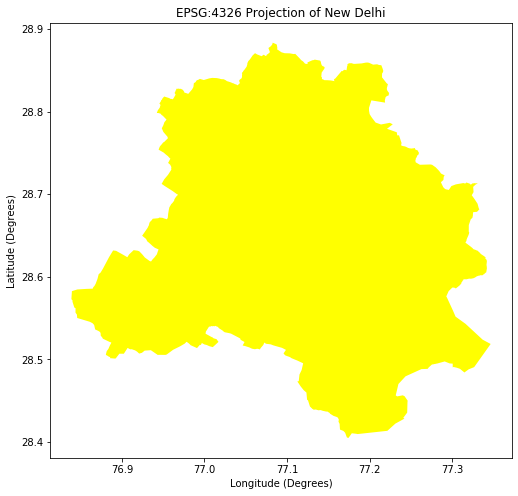

In [625]:
# Converting the geodataframe to a shapefile, reading it and plotting it

delhi.to_file('Delhi.shp', driver='ESRI Shapefile')
fp = "Delhi.shp"
dataD = gpd.read_file(fp)

fig, ax = plt.subplots(figsize=(12, 8))

dataD.plot(ax=ax,facecolor='yellow')

# Setup x y axes with labels 
ax.set(xlabel="Longitude (Degrees)", ylabel="Latitude (Degrees)",title="EPSG:4326 Projection of New Delhi")
ax.set_axisbelow(True)

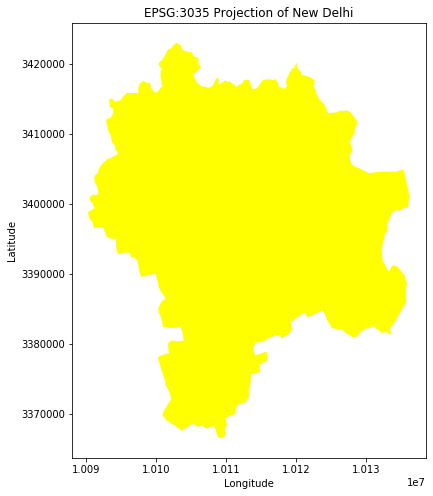

In [626]:
# Projecting Delhi's data to a different format (EPSG:3035)

data_proj = dataD.copy()

# Reproject the geometries by replacing the values with projected ones
data_proj = data_proj.to_crs(epsg=3035)
fig, ax = plt.subplots(figsize=(12, 8))
data_proj.plot(ax=ax,facecolor='yellow')

# Setup x y axes with labels 
ax.set(xlabel="Longitude", ylabel="Latitude",title="EPSG:3035 Projection of New Delhi")
ax.set_axisbelow(True)

Since this is not the actual shape of Delhi's map while the one plotted before is more accurate, we stick to the EPSG:4326 Projection

# Using Overpass queries to import POI Data for New Delhi

In [627]:
# Collecting location data for shops (the various types listed in the query) and storing it in the variable 'coords1'
api = overpy.Overpass()
r = api.query("""
area["ISO3166-2"="IN-DL"][admin_level=4];
(node["shop"~"alcohol|beverages|butcher|dairy|mall|supermarket|department_store|wholesale|clothes|fabric|fashion|fashion_accessories|bag|shoes|jewelry|watches|beauty|chemist|cosmetics|appliance|electrical|bathroom_furnishing|houseware|bed|carpet|curtain|doors|furniture|kitchen|tiles|computer|electronics|mobile_phone|art|craft|books|stationery"](area);
);
out center;
""")
coords1=[]
coords1 += [(float(node.lon), float(node.lat)) 
           for node in r.nodes]

In [628]:
# Collecting location data for amenities (the various types listed in the query) and storing it in the variable 'coords'

r = api.query("""
area["ISO3166-2"="IN-DL"][admin_level=4];
(node["amenity"~"cafe|fast_food|bar|food_court|pub|restaurant|atm|cinema|community_centre"](area);
);
out center;
""")
coords  = []
coords += [(float(node.lon), float(node.lat)) 
           for node in r.nodes]

# Converting OSM data to shapefile and plotting it

In [629]:
# Combining both lists (coords and coords1)
a=coords+coords1

In [630]:
len(a)

1846

In [631]:
# Converting list to a numpy array
add_points = np.array(a)

# Turn points into list of x,y shapely points 
locations = [Point(xy) for xy in add_points]

In [632]:
# Create geodataframe using the shapely points
locations = gpd.GeoDataFrame(locations, 
                                  columns=['geometry'],
                                  crs='epsg:4326')
locations.head(3)

,geometry
0,POINT (77.15189 28.53349)
1,POINT (77.16822 28.51011)
2,POINT (77.16822 28.50993)


In [633]:
# Saving GeoDataFrame to ShapeFile format
locations.to_file('OSMData.shp', driver='ESRI Shapefile')

In [634]:
fp = "OSMData.shp"
data1 = gpd.read_file(fp)

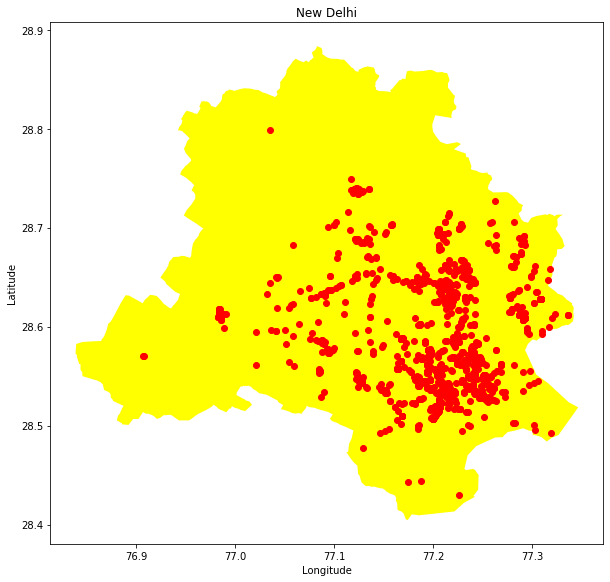

In [635]:
# Plotting ShapeFile 

fig, ax = plt.subplots(figsize=(12, 8))
dataD.plot(ax=ax,facecolor='yellow');

data1.plot(facecolor='red',axes=ax);

# Add title
plt.title("WGS84 projection");

# Remove empty white space around the plot
plt.tight_layout()


# Setup x y axes with labels 
ax.set(xlabel="Longitude", ylabel="Latitude",title="New Delhi")
ax.set_axisbelow(True)

# DBSCAN Clustering of OSM Data Points

In [636]:
# Converting OSM data to a dataframe
df = pd.DataFrame(a,columns=['lon','lat'])
df.head(3)

,lon,lat
0,77.151895,28.533492
1,77.168215,28.510106
2,77.168219,28.509931


In [637]:
# Define the number of kms in 1 radian
kms_per_radian = 6371.0088 
# Represent points consistently as (lat, lon) in a matrix
coords = df.as_matrix(columns=['lon', 'lat'])
# We define epsilon as 0.110 kilometers, converted to radians for use by haversine metric
epsilon = 0.110 / kms_per_radian

In [638]:
# Applying the DBSCAN Clustering Algorithm (setting the minimum number of samples as 3 and using haversine metric)

db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
unique_labels = set(cluster_labels)

# Get the number of clusters
num_clusters = len(set(cluster_labels))-1

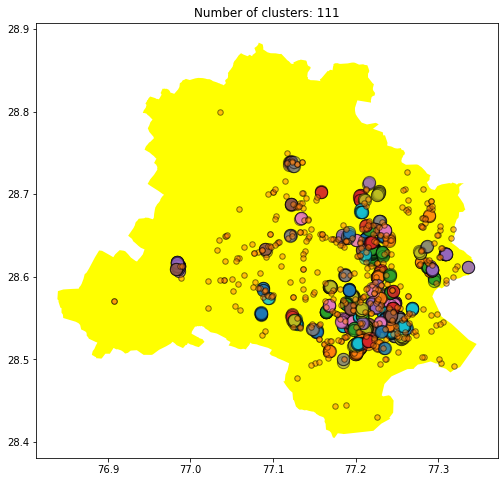

In [639]:
# Get colors and plot all the points, color-coded by cluster (or gray if not in any cluster => noise)
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

dataD.plot(ax=ax,facecolor='yellow');

# For each cluster label and color, plot the cluster's points
for cluster_label, color in zip(unique_labels, colors):
    
    size = 150
    if cluster_label == -1:
        size = 30
    
    # Plot the points that match the current cluster label
    x_coords = coords[cluster_labels==cluster_label][:,1]
    y_coords = coords[cluster_labels==cluster_label][:,0]
    ax.scatter( y=x_coords,x=y_coords, edgecolor='k', s=size, alpha=0.5)

ax.set_title('Number of clusters: {}'.format(num_clusters))
plt.show()


# Eliminating non-significant points and plotting clusters

In [640]:
# Assigning cluster labels to the data-frame
df['cluster_labels']=cluster_labels
df.tail(3)

,lon,lat,cluster_labels
1843,77.241668,28.565276,26
1844,77.198307,28.507714,-1
1845,77.200616,28.508039,11


In [641]:
# Removing noise points (clusters with label as -1) from the data-frame
df=df[df.cluster_labels!=-1]

In [642]:
# Converting dataframe to polygon shapefile for submission
newdata = gpd.GeoDataFrame()
for i in range(111):
    df1=df[df.cluster_labels==i]
    add=df1.to_numpy()
    add=np.delete(add,2,1)
    zs=np.ndarray.tolist(add)
    poly= Polygon(zs)
    newdata.loc[i, 'geometry'] = poly

In [643]:
newdata.head(3)

,geometry
0,"POLYGON ((77.15189 28.53349, 77.15266 28.53587..."
1,"POLYGON ((77.16822 28.51011, 77.16822 28.50993..."
2,"POLYGON ((77.16449 28.55731, 77.16376 28.55733..."


In [644]:
# Saving GeoDataFrame to ShapeFile format
newdata.to_file('ATLAN_ShapeFile.shp', driver='ESRI Shapefile')

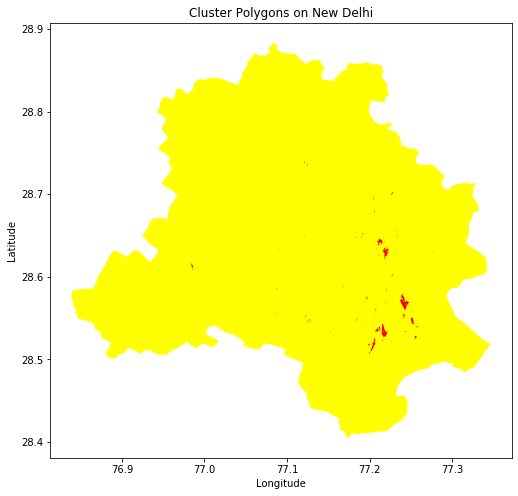

In [645]:
# Reading shapefile and plotting it
fp = "ATLAN_ShapeFile.shp"
data1 = gpd.read_file(fp)

# Plotting ShapeFile 
fig,ax= plt.subplots(figsize=(12,8))
# Plot the WGS84
ax=dataD.plot(ax=ax,facecolor='yellow');

data1.plot(axes=ax,facecolor='red');

# Setup x y axes with labels 
ax.set(xlabel="Longitude", ylabel="Latitude",title="Cluster Polygons on New Delhi")
ax.set_axisbelow(True)

# Cluster Analysis

1) Calculating the Silhouette Coefficient

In [646]:
coefficient = metrics.silhouette_score(coords, cluster_labels)
print('Silhouette coefficient: {:0.04f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Silhouette coefficient: 0.2519


This is a decent value of Silhouette Coefficient (-1 being the worst and 1 being the best)

2) Checking the distribution of number of points in clusters

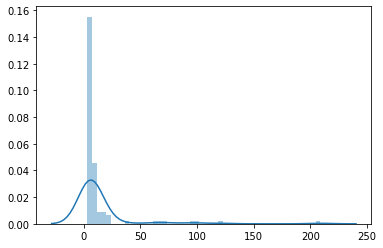

In [647]:
clus_sizes = df.groupby('cluster_labels').size()
z=clus_sizes.to_numpy()
sns.distplot(z)

3) Calculating the number of points in each cluster (and elimination of non significant clusters)

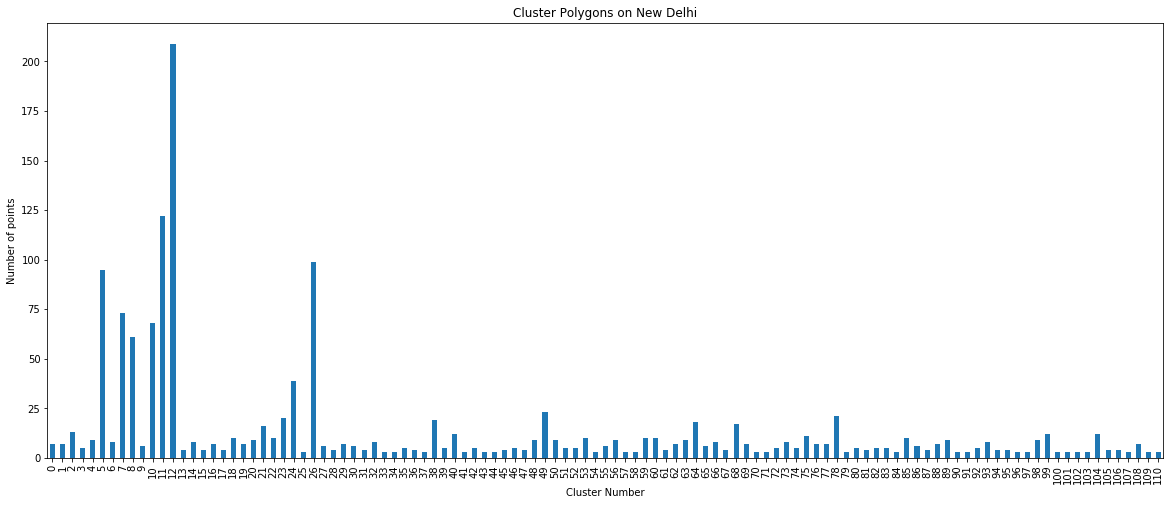

In [648]:
fig,ax= plt.subplots(figsize=(20,8))
clus_sizes.plot(ax=ax,kind='bar')
ax.set(xlabel="Cluster Number", ylabel="Number of points",title="Cluster Polygons on New Delhi")
ax.set_axisbelow(True)

In [649]:
# Calculating the average number of points in each cluster
avg=np.average(z)

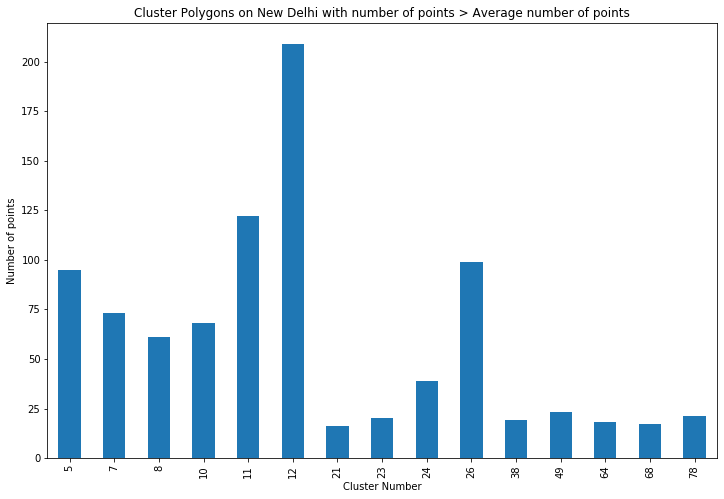

In [650]:
# Removing clusters with number of points lesser than the average number of points
clus_sizes=clus_sizes[clus_sizes>avg]
fig,ax= plt.subplots(figsize=(12,8))
clus_sizes.plot(ax=ax,kind='bar')
ax.set(xlabel="Cluster Number", ylabel="Number of points",title="Cluster Polygons on New Delhi with number of points > Average number of points")
ax.set_axisbelow(True)

In [651]:
clus_sizes

cluster_labels
5      95
7      73
8      61
10     68
11    122
12    209
21     16
23     20
24     39
26     99
38     19
49     23
64     18
68     17
78     21
dtype: int64

These are the most significant clusters according to the number of points in each cluster

In [652]:
# Individual analysis of where these points lie on Delhi's map using Google Maps
a=df[df['cluster_labels']==11]
a

,lon,lat,cluster_labels
43,77.205986,28.520364,11
44,77.207120,28.523299,11
45,77.207134,28.523747,11
77,77.207391,28.523450,11
209,77.207631,28.523405,11
...,...,...,...
1821,77.206214,28.518339,11
1830,77.206376,28.519295,11
1831,77.206396,28.519326,11
1832,77.206405,28.519370,11


4) Calculating the area of each cluster (and elimination of non significant clusters)

In [653]:
newdata['Cluster_Area']=newdata['geometry'].area
avg_a=np.average(newdata['Cluster_Area'])
avg_a

2.914750796894124e-06

In [654]:
newdata=newdata[newdata['Cluster_Area']>avg_a]
newdata

,geometry,Cluster_Area
5,"POLYGON ((77.21724 28.52479, 77.21456 28.53423...",0.000075
7,"POLYGON ((77.25095 28.54997, 77.25115 28.54998...",0.000030
8,"POLYGON ((77.21120 28.53635, 77.21187 28.53624...",0.000011
10,"POLYGON ((77.21076 28.64056, 77.21060 28.64070...",0.000029
11,"POLYGON ((77.20599 28.52036, 77.20712 28.52330...",0.000032
12,"POLYGON ((77.21969 28.63509, 77.22010 28.63471...",0.000020
18,"POLYGON ((77.22832 28.70355, 77.22657 28.69988...",0.000003
24,"POLYGON ((76.98580 28.61320, 76.98641 28.61280...",0.000006
26,"POLYGON ((77.24669 28.56574, 77.24655 28.56604...",0.000063
48,"POLYGON ((77.25549 28.52429, 77.25438 28.52481...",0.000004


These are the most significant clusters according to the area of each cluster

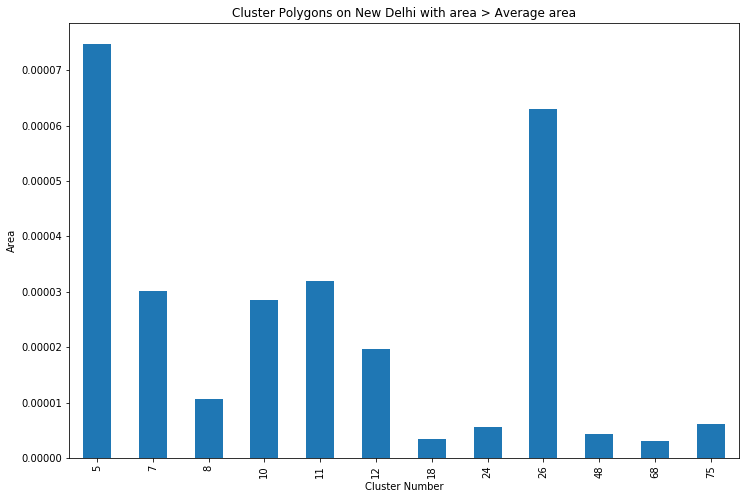

In [655]:
fig,ax= plt.subplots(figsize=(12,8))
newdata['Cluster_Area'].plot(ax=ax,kind='bar')
ax.set(xlabel="Cluster Number", ylabel="Area",title="Cluster Polygons on New Delhi with area > Average area")
ax.set_axisbelow(True)